# Evaluation Metrics

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\H P\Desktop\Machine Learning Zoomcamp\Logistic Regression\Telco-Customer-Churn.csv") #load dataset from copy downloaded from kaggle

In [4]:
###formats column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

###formats all index by removing spaces and making index lowercase. ie formats rows
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')  #changes object dtypes to int and second input ignores nulls, and  other dtypes included

df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)  #assigns 0 and 1 to yes and no


In [5]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1) ##splits test to 20%
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1) ##splits full train to train and validation 60 and 20%

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True) 
## maintains the default indexing.

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values   ##saves y values (churn) separately. and deletes churn  column from original df

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [6]:
numerical = ['tenure','monthlycharges', 'totalcharges' ]

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
     'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [7]:
from sklearn.feature_extraction import DictVectorizer
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records') #aligns horizontally our entire train dataset, side by sidein landscape
dv = DictVectorizer(sparse=False)  #creates a dict vectorizer instance
dv.fit(train_dicts) #passes the dicts
X_train = dv.transform(train_dicts)   #gives the encoded matrix ()

##repeat for val dataset without fitting. we only fit train

val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=10000 )  #initiates an instance
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [62]:
##model.predict(X_train)  #returns predictions of 0 or 1 as churn or no churn. this is called hard predictions
##model.predict_proba(X_train) #soft predict return probability first column is prob of no churn, second is prob of churn.
y_pred = model.predict_proba(X_val)[:,1] #takes only prob of churn rations. We focus on val data
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()


0.8034066713981547

In [10]:
len(y_val)
(y_val == churn_decision).sum()  ##predicts 1132 correct out of total inputs of y_val ie 1409

1132

In [11]:
thresholds = np.linspace(0,1,21)  ##sets range of churn ratios instead of 0.5
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    scores.append(score)

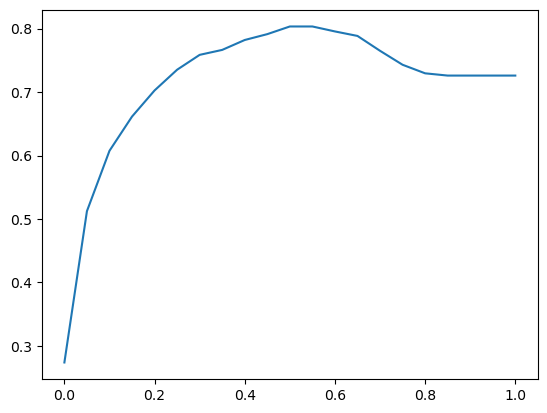

In [12]:
 plt.plot(thresholds, scores) ##finds the best thresholds for the model. 0.5 is the best

In [13]:
##using sklearn to check score
thresholds = np.linspace(0,1,21)  ##sets range of churn ratios instead of 0.5
from sklearn.metrics import accuracy_score

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score) 


0.00 0.274
0.05 0.512
0.10 0.608
0.15 0.661
0.20 0.703
0.25 0.735
0.30 0.759
0.35 0.767
0.40 0.782
0.45 0.791
0.50 0.803
0.55 0.803
0.60 0.796
0.65 0.789
0.70 0.765
0.75 0.743
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [14]:
##For class imbalance, accuracy could be misleading, other metrics may be better. 

### Confusion Table

In [15]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [16]:
tp = (predict_positive & actual_positive).sum() ##sees the number true positives
tn = (predict_negative & actual_negative).sum() ##sees true negative
fp = (predict_positive & actual_negative).sum() ##false positive
fn = (predict_negative & actual_positive).sum() ##false negative

#compares predicted value to actal value for each set

In [17]:
tp, tn, fp, fn

(212, 920, 103, 174)

In [18]:
confusion_matrix = np.array([[tn,fp],[tp,fn]]) 
confusion_matrix

array([[920, 103],
       [212, 174]])

In [19]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.15, 0.12]])

## Precision and Recall

In [20]:
p = tp / (tp + fp) #precision true positives out of all positive observations
p

0.6730158730158731

In [21]:
r = tp / (tp +fn) #recall true positives out of actual positive observation
r

0.5492227979274611

  ## ROC CURVES

#### True Positive Rate and False Positive Rate

In [22]:
tpr = tp / (tp +fn)
tpr

0.5492227979274611

In [23]:
fpr = fp / (fp +tn)
fpr

0.10068426197458455

In [24]:
scores = []
thresholds = np.linspace( 0, 1 , 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum() ##sees the number true positives
    tn = (predict_negative & actual_negative).sum() ##sees true negative
    fp = (predict_positive & actual_negative).sum() ##false positive
    fn = (predict_negative & actual_positive).sum() ##false negative

    scores.append((t, tp, fp, fn, tn))

In [25]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 895, 1, 128),
 (0.02, 383, 804, 3, 219),
 (0.03, 382, 750, 4, 273),
 (0.04, 382, 709, 4, 314),
 (0.05, 378, 679, 8, 344),
 (0.06, 377, 653, 9, 370),
 (0.07, 374, 623, 12, 400),
 (0.08, 371, 588, 15, 435),
 (0.09, 370, 558, 16, 465),
 (0.1, 366, 533, 20, 490),
 (0.11, 364, 511, 22, 512),
 (0.12, 361, 497, 25, 526),
 (0.13, 360, 483, 26, 540),
 (0.14, 358, 462, 28, 561),
 (0.15, 353, 444, 33, 579),
 (0.16, 350, 431, 36, 592),
 (0.17, 349, 415, 37, 608),
 (0.18, 347, 399, 39, 624),
 (0.19, 345, 381, 41, 642),
 (0.2, 339, 372, 47, 651),
 (0.21, 335, 355, 51, 668),
 (0.22, 327, 333, 59, 690),
 (0.23, 323, 320, 63, 703),
 (0.24, 319, 310, 67, 713),
 (0.25, 314, 301, 72, 722),
 (0.26, 313, 287, 73, 736),
 (0.27, 309, 277, 77, 746),
 (0.28, 303, 264, 83, 759),
 (0.29, 298, 252, 88, 771),
 (0.3, 293, 247, 93, 776),
 (0.31, 288, 241, 98, 782),
 (0.32, 283, 234, 103, 789),
 (0.33, 277, 226, 109, 797),
 (0.34, 275, 221, 111, 802),
 (0.35000000000000003, 273, 2

In [26]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns = columns)

df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,895,1,128
2,0.02,383,804,3,219
3,0.03,382,750,4,273
4,0.04,382,709,4,314
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [27]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,895,1,128,0.997409,0.874878
2,0.02,383,804,3,219,0.992228,0.785924
3,0.03,382,750,4,273,0.989637,0.733138
4,0.04,382,709,4,314,0.989637,0.693060
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


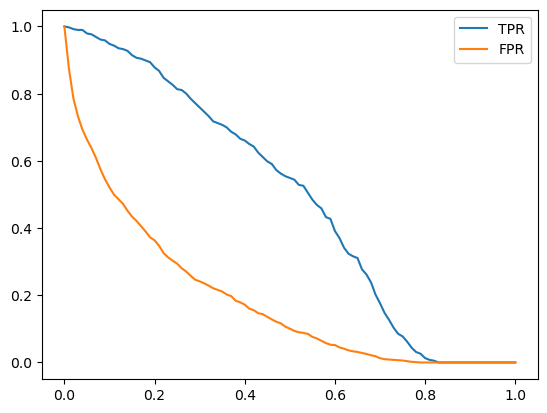

In [28]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR' )
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')
plt.legend()

### Random Model

In [29]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1 , size = len(y_val))

In [30]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [31]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace( 0, 1 , 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum() ##sees the number true positives
        tn = (predict_negative & actual_negative).sum() ##sees true negative
        fp = (predict_positive & actual_negative).sum() ##false positive
        fn = (predict_negative & actual_positive).sum() ##false negative

        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns = columns)
        
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [32]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [33]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


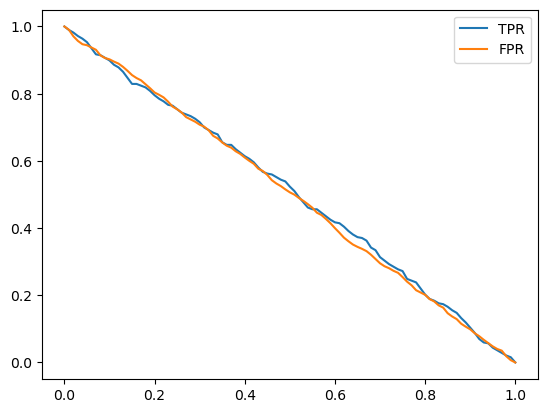

In [34]:
plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR' )
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')
plt.legend()

### Ideal Model

In [35]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [36]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [37]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [38]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [44]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


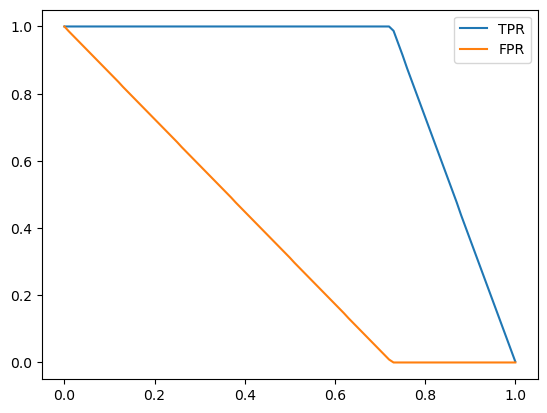

In [45]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR' )
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR')
plt.legend()

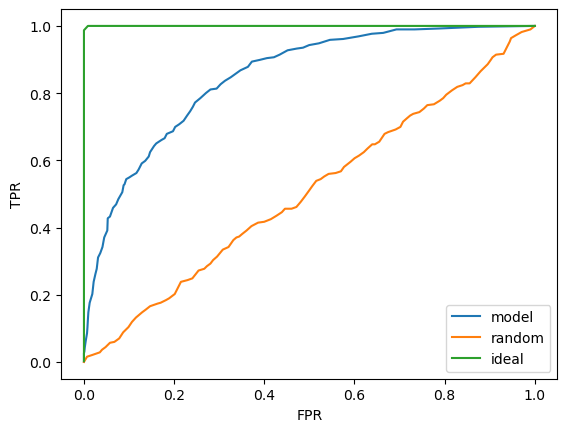

In [48]:
plt.plot(df_scores.fpr, df_scores.tpr, label ='model')
plt.plot(df_rand.fpr, df_rand.tpr, label ='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label ='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

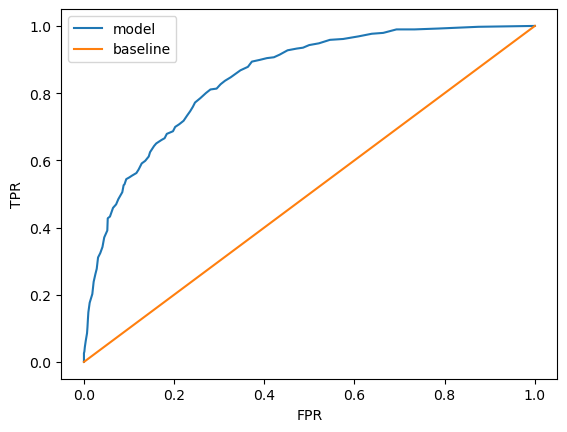

In [49]:
#roc curve is a plot of tpr against fpr and a random baseline drawn as shown below
#the further away a model is from the baseline, the higher the accuracy, the closer it is to the ideal spot, the better the accuracy
plt.plot(df_scores.fpr, df_scores.tpr, label ='model')

plt.plot([0,1], [0,1], label ='baseline')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

### ROC CURVE with SkLearn

In [51]:
from sklearn.metrics import roc_curve
roc_curve(y_val, y_pred)
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

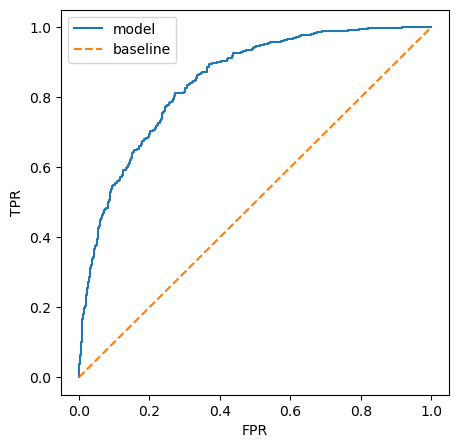

In [54]:
plt.figure(figsize = (5,5)) ##makes the plot square and not rect
plt.plot(fpr, tpr, label ='model')

plt.plot([0,1], [0,1], label ='baseline', linestyle = '--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

#### ROC AUC 
area under the curve

In [57]:
#for an ideal model, the area under the curve is 1.0, hence the auc of a model should be closer to 1.0 to be good. 

from sklearn.metrics import auc ##auc computes area under any curve
auc(fpr, tpr) #this fpr, tpr is values computed by sklearn from the roc_curve

#easier way
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8464639711505832

In [56]:
#compare with our manual calc of fpr, tpr in the formula 
auc(df_scores.fpr, df_scores.tpr)

0.8461955338104428

#### K-Fold Cross Validation

In [79]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')

    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='lbfgs', max_iter=10000, C=C)
    model.fit(X_train, y_train)

    return dv, model

In [87]:
dv, model = train(df_train, y_train, C=1.0) 
#the smaller the C, the stronger the regularization. default is 1.0

In [89]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient = 'records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]

    return y_pred

In [90]:
y_pred = predict(df_val, dv, model)

In [91]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10, shuffle=True, random_state = 1)

In [72]:
#iterations takes time for each, to see progress tqdm
#!pip install tqdm

In [74]:
from tqdm.auto import tqdm

##displays progress bar when training below

In [93]:
#train_idx, val_idx = next(kfold.split(df_full_train)) #divides the dataset into 10 and trains 9 parts and validates 1 parts and iterates 10 times.
#returns the index for the trained parts and validated parts)
scores = []
# Compute formula to calculate AUC for each of the 10 groups
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    #uses func created for train and predict to train and predict each part
    dv, model = train(df_train, y_train, C=1.0 ) #takes each part of the train and does DV, and fit the model
    y_pred = predict(df_val, dv, model) #predicts on val for each model 

    auc = roc_auc_score(y_val, y_pred) #find auc score for each iteration
    scores.append(auc) #stores all in the scores array above

0it [00:00, ?it/s]

In [94]:
scores
#gives auc score for each of the 10 iteration below

[0.8496732026143792,
 0.8423886138613862,
 0.8585452552198395,
 0.8334046580528351,
 0.8245192307692308,
 0.840975690975691,
 0.8431292738521654,
 0.8252292852624921,
 0.8457833111012302,
 0.8610130751907499]

In [95]:
np.mean(scores), np.std(scores)

(0.84246615969, 0.011702352281578364)

In [97]:
#trains full dataset and test on test dataset

dv, model = train(df_full_train, df_full_train.churn.values, C=1.0 )  
y_pred = predict(df_test, dv, model) #predicts on val for each model 

auc = roc_auc_score(y_test, y_pred)
auc

0.8583409167235421

In [98]:
## the difference between model performance on val and test datasets should be close hence 

In cases of large dataset, usual 2 split is fine , k-fold cross validation is used for smaller datasets and to understand how much a model varies across diferent parts of the dataset. Usually the normal 60-20-20 once split is fine